# Dependencies

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Iterative Imputer & Random Forest
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Importing Data

In [72]:
raw_data = pd.read_csv('city_day.csv')

In [73]:
raw_data.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


# Data Preprocessing

- Drop AQI_Bucket, not needed for this task
- Drop any rows missing AQI values from simplicity

In [74]:
# Creating dataset from raw data, dropping AQI Bucket
data = raw_data.drop(['AQI_Bucket'], axis=1)

# Dropping rows with missing AQI values
data = data.dropna(subset=['AQI'])

# Convert the date to correct format
data['Date'] = pd.to_datetime(data['Date'])

- Reduce the data to 3 cities to reduce geographical variation: Jaipur, Amritsar, Thiruvananthapuram

In [94]:
regions = ['Amritsar', 'Thiruvananthapuram', 'Amritsar']
data = data[data['City'].isin(regions)]

# Reset Index
data = data.reset_index(drop=True)

In [76]:
# Data summaries 
np.round(data.describe(),3)

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,2178,2085.000,2147.000,2127.000,2168.000,1935.000,2073.000,2132.000,2045.000,2096.000,974.000,958.000,956.000,2178.000
mean,2018-12-12 20:03:58.016528896,41.675,84.917,11.285,14.128,20.914,9.945,0.766,6.964,28.747,4.227,3.070,7.566,98.648
min,2017-02-28 00:00:00,2.000,10.540,0.400,0.790,1.000,0.060,0.000,0.410,1.310,0.000,0.000,0.000,20.000
25%,2018-03-08 00:00:00,20.000,45.030,2.165,7.360,6.200,3.960,0.490,4.000,16.870,1.720,1.300,2.000,61.000
50%,2018-12-22 00:00:00,33.880,68.400,9.330,10.800,16.730,7.440,0.750,5.790,26.450,3.225,2.060,6.570,82.000
75%,2019-09-28 18:00:00,52.530,104.525,15.545,16.693,27.475,12.060,0.970,8.270,37.898,5.358,2.928,10.062,115.000
max,2020-07-01 00:00:00,868.660,917.080,103.440,237.270,150.960,129.460,5.590,67.260,97.280,26.090,30.210,53.590,869.000
std,NaN,37.689,62.520,12.462,12.359,20.949,10.261,0.561,5.512,15.990,3.566,2.949,6.161,62.731


Missing Values

*EDA on how pollutants vary with AQI*

In [77]:
# Missing Values
data.isnull().sum()

City          0
Date          0
PM2.5        93
PM10         31
NO           51
NO2          10
NOx         243
NH3         105
CO           46
SO2         133
O3           82
Benzene    1204
Toluene    1220
Xylene     1222
AQI           0
dtype: int64

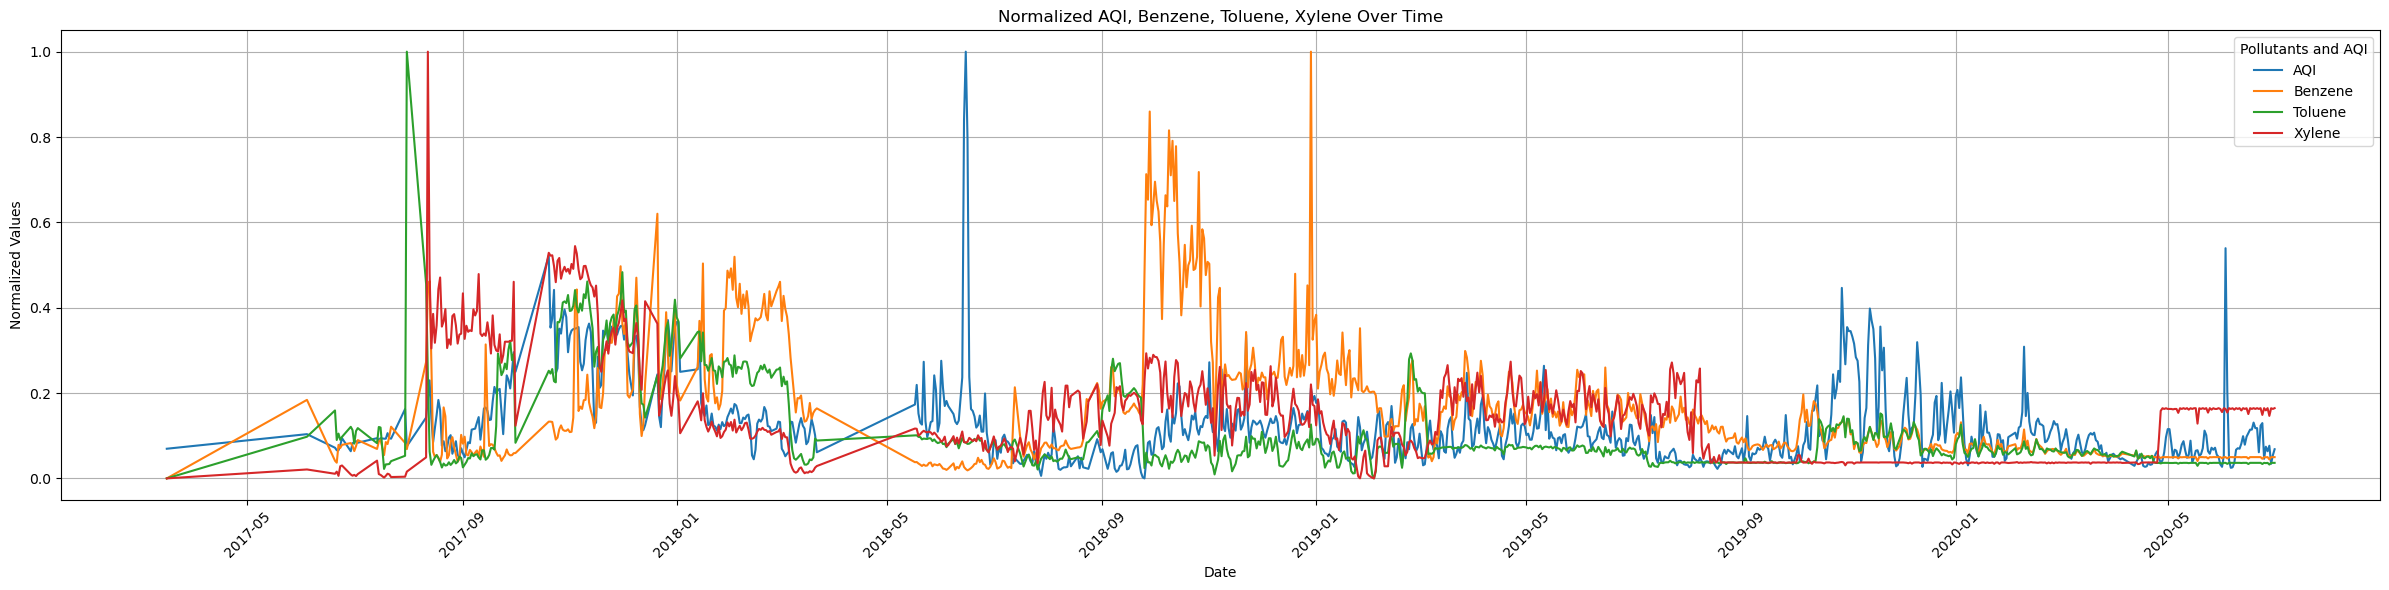

In [78]:
# Select relevant columns (AQI, Benzene, Toluene, Xylene, and Date)
columns_to_normalize = ['AQI', 'Benzene', 'Toluene', 'Xylene']

# Drop rows with missing values in these columns to avoid issues during normalization
df_filtered = data[['Date'] + columns_to_normalize].dropna()

# Normalize the selected columns using Min-Max scaling (0 to 1)
scaler = MinMaxScaler()
df_filtered[columns_to_normalize] = scaler.fit_transform(df_filtered[columns_to_normalize])

# Plot the normalized data
plt.figure(figsize=(24, 6))  # Adjust figure size as needed

# Plot each pollutant and AQI over time
for col in columns_to_normalize:
    plt.plot(df_filtered['Date'], df_filtered[col], label=col)

# Customize the plot
plt.title('Normalized AQI, Benzene, Toluene, Xylene Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend(title='Pollutants and AQI')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)  # Rotate the date labels for better readability
plt.tight_layout()
plt.show()

In [79]:
df_filtered.drop(['Date'], axis=1).corr()

,AQI,Benzene,Toluene,Xylene
AQI,1.000000,0.155366,0.505528,0.337647
Benzene,0.155366,1.000000,0.281794,0.289149
Toluene,0.505528,0.281794,1.000000,0.411964
Xylene,0.337647,0.289149,0.411964,1.000000


- Drop Benzene, Toluene, Xylene as these do not directly correlate with AQI and have significant numbers of missing values

In [80]:
# Drop Benzene, Toluene, Xylene from data
data.drop(['Benzene', 'Toluene', 'Xylene'], axis=1, inplace=True)

*Heatmaps to show distribution of missing data*

<Figure size 1500x1000 with 0 Axes>

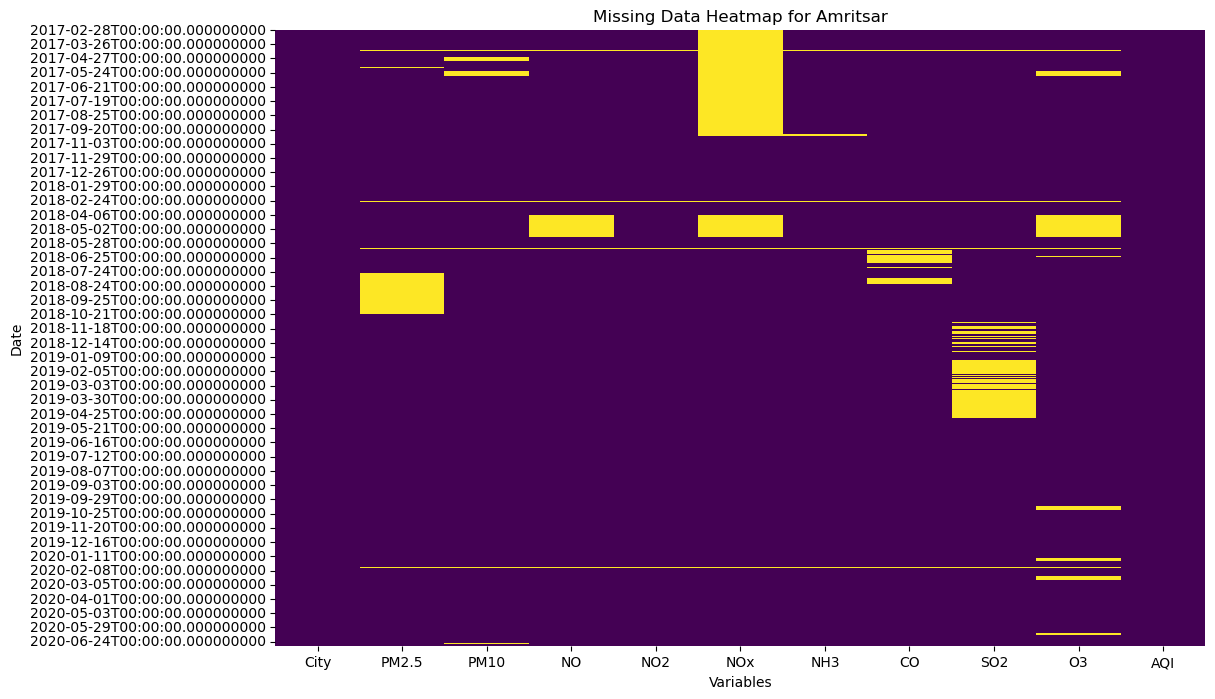

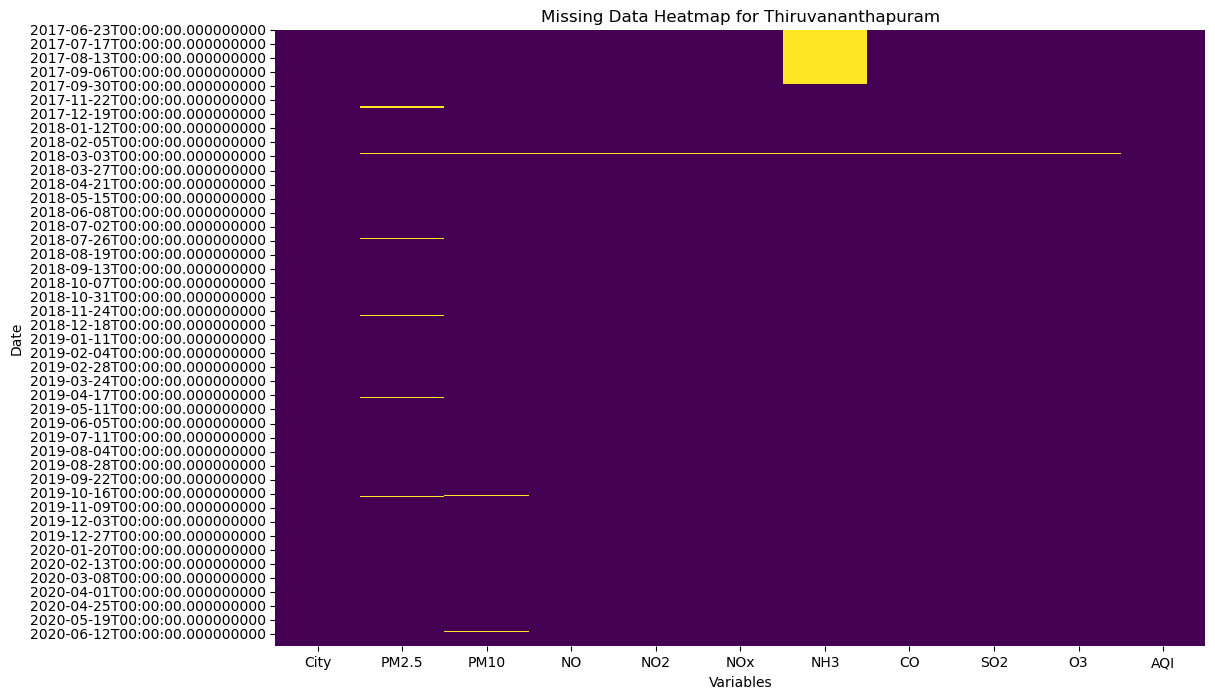

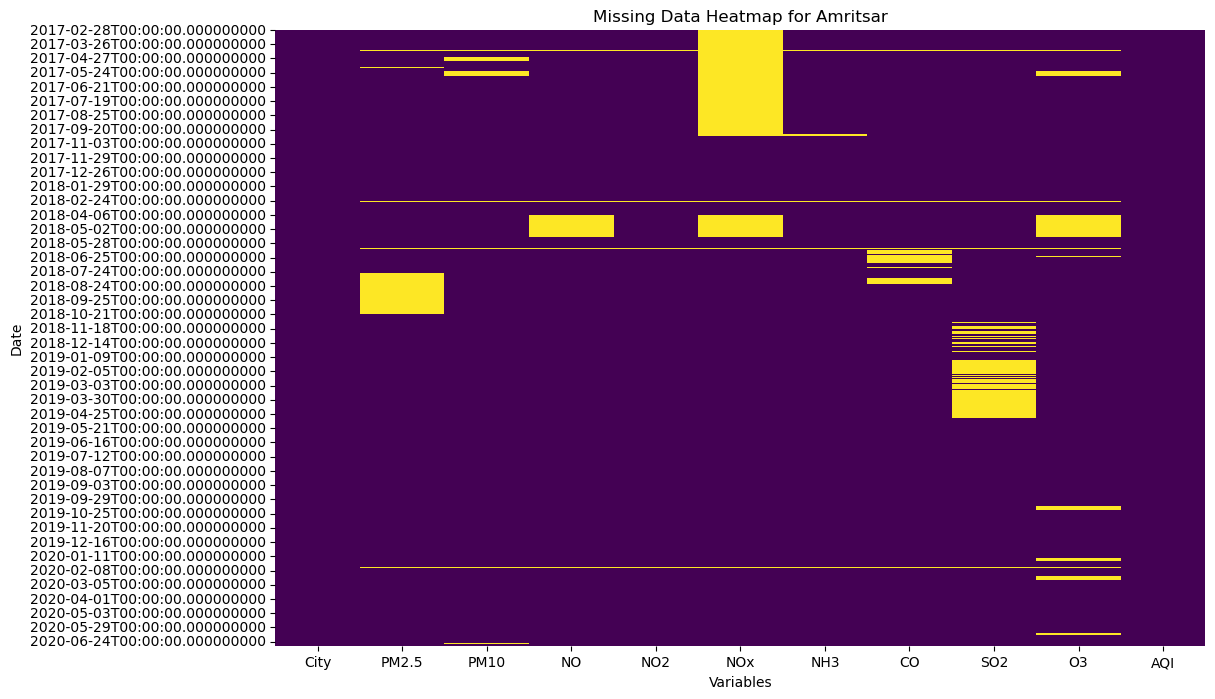

In [81]:
plt.figure(figsize=(15, 10))  # Set the overall figure size

for city in regions:
    # Filter data for the city
    city_data = data[data['City'] == city]
    
    # Set 'Date' as index for better time-based heatmap
    city_data.set_index('Date', inplace=True)
    
    # Create a heatmap of missing values (True = missing, False = present)
    plt.figure(figsize=(12, 8))
    sns.heatmap(city_data.isnull(), cbar=False, cmap='viridis')
    
    # Customize plot
    plt.title(f"Missing Data Heatmap for {city}")
    plt.xlabel("Variables")
    plt.ylabel("Date")
    
    # Show the plot
    plt.show()

*Add missing Values using Iterative Imputer package*

In [ ]:
# Drop the 'City' and 'Date' column, as it's not used for imputation
data_model = data.drop(['City', 'Date'], axis=1)

# Initialize the Iterative Imputer with a RandomForestRegressor
imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=42)

# Apply the imputer to the dataset
df_imputed = pd.DataFrame(imputer.fit_transform(data_model), columns=data_model.columns)

# Display information about missing values after imputation
print(df_imputed.isnull().sum())

# Merge the imputed dataframe and the dataset
data_new = pd.concat([data[['City', 'Date']], df_imputed], axis=1)


In [100]:
data_new.isna().sum()

City     0
Date     0
PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

Outliers

*Box plots for each pollutant*

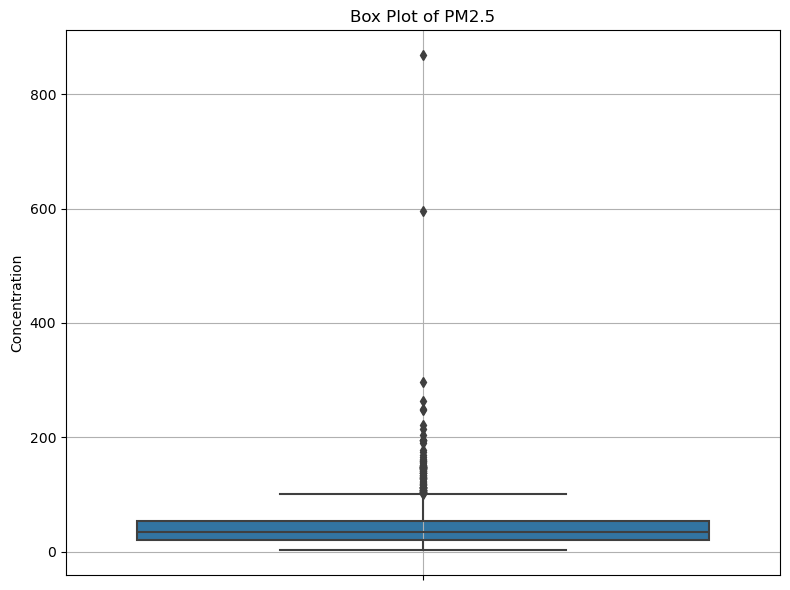

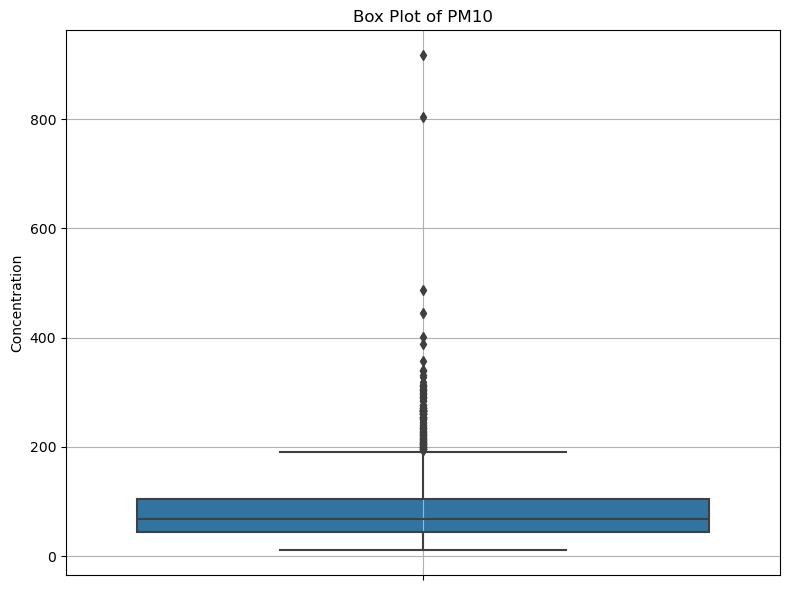

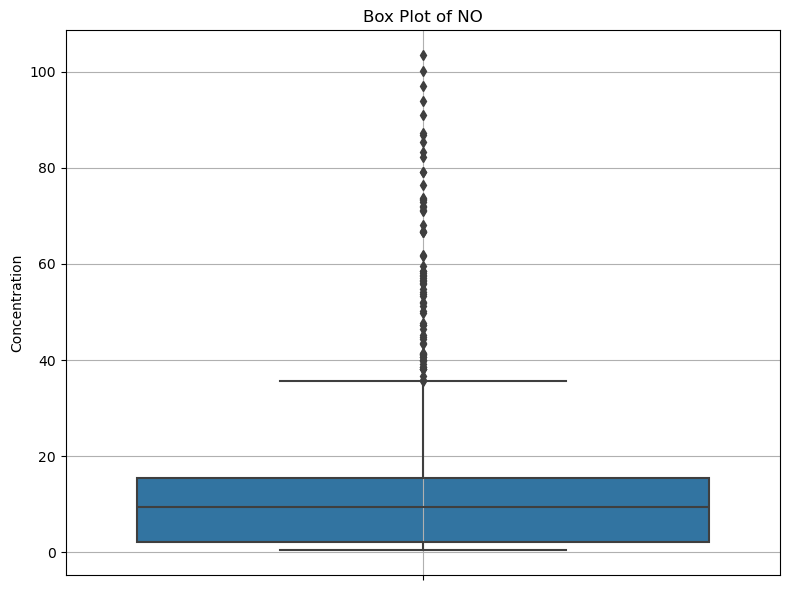

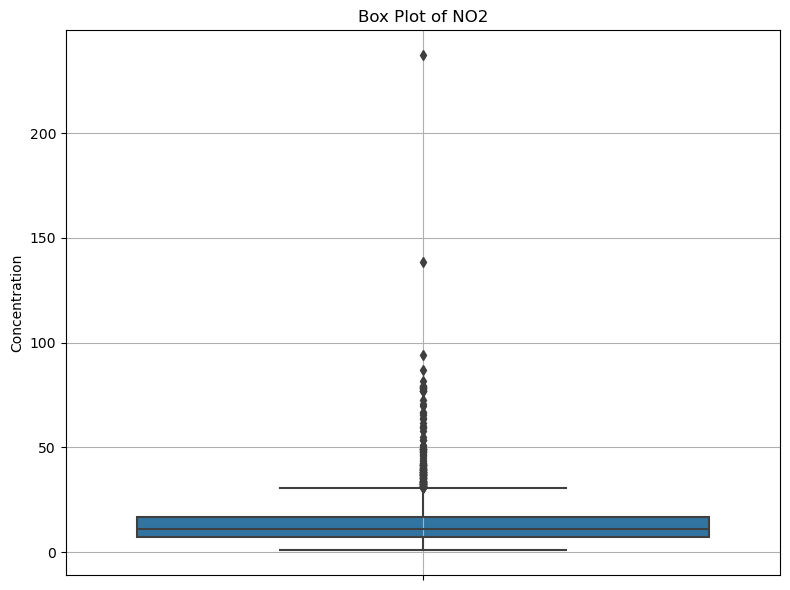

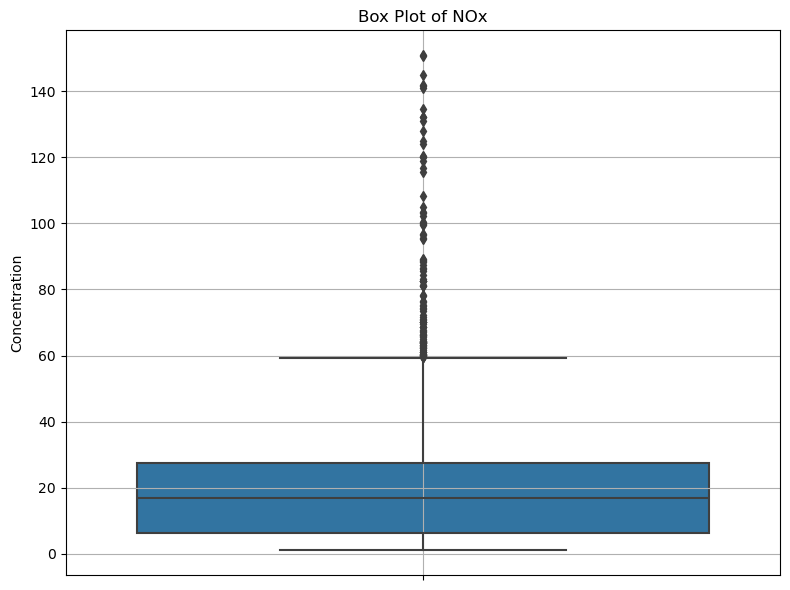

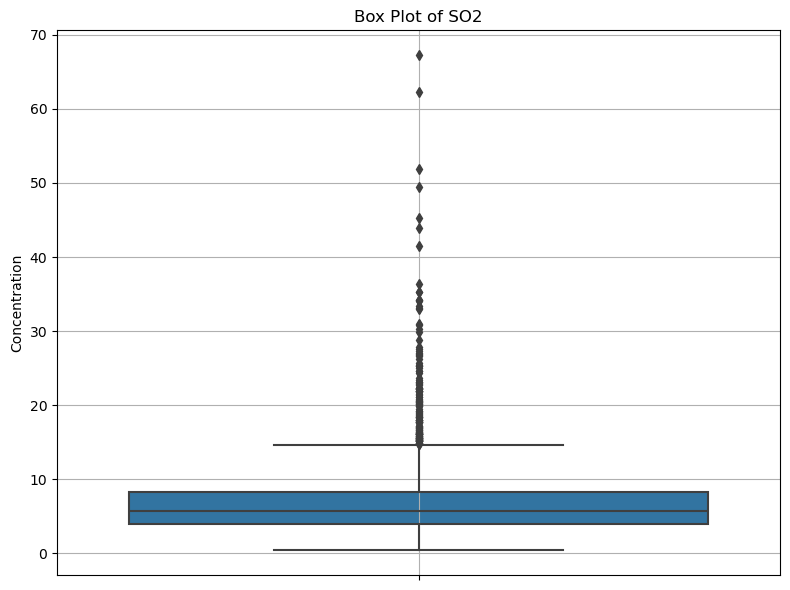

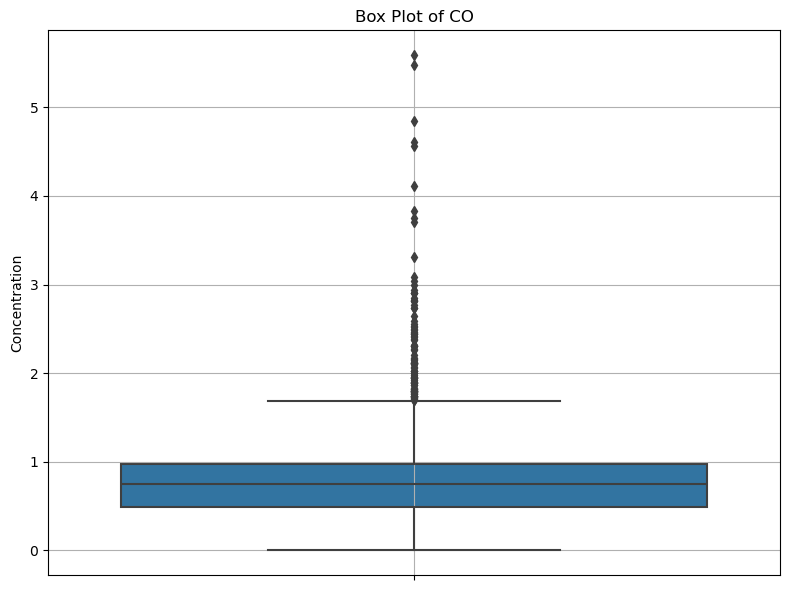

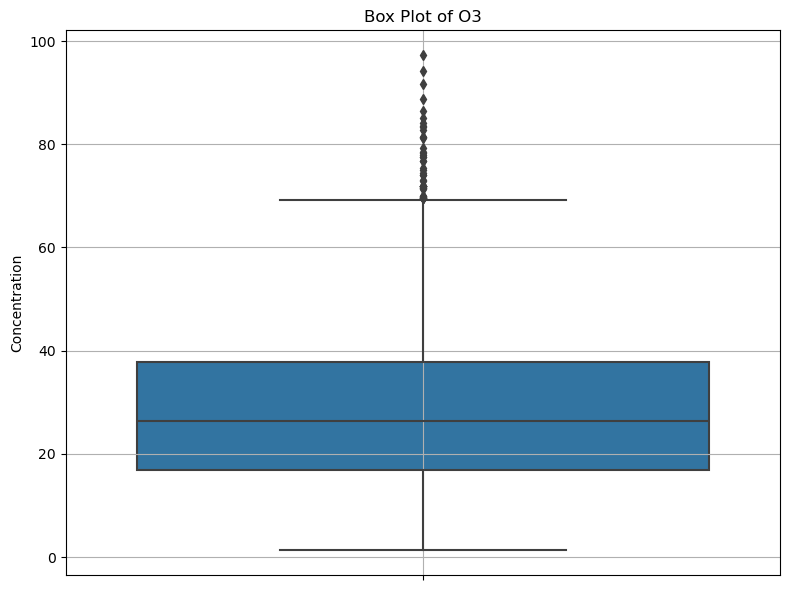

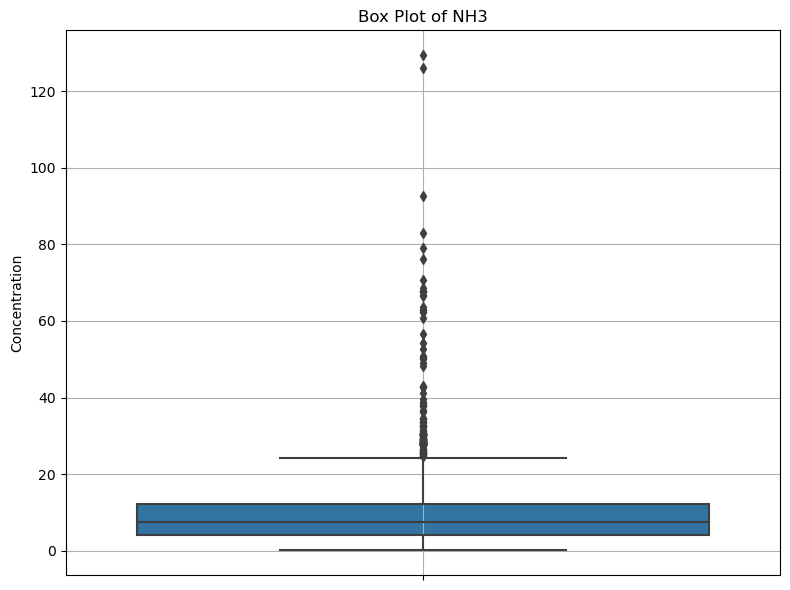

In [102]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'SO2', 'CO', 'O3', 'NH3']

for pollutant in pollutants:
    plt.figure(figsize=(8, 6))  # Set the figure size for each plot
    
    # Create a boxplot for the current pollutant
    sns.boxplot(y=data[pollutant])
    
    # Customize the plot
    plt.title(f"Box Plot of {pollutant}")
    plt.ylabel("Concentration")
    plt.grid(True)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [103]:
# Function to count outliers in a given series (column)
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers.count()


# Create a dictionary to store the outlier counts for each pollutant
outlier_counts = {pollutant: count_outliers(data[pollutant]) for pollutant in pollutants}

# Display the outlier counts
for pollutant, count in outlier_counts.items():
    print(f"Number of outliers in {pollutant}: {count}")


Number of outliers in PM2.5: 93
Number of outliers in PM10: 119
Number of outliers in NO: 74
Number of outliers in NO2: 147
Number of outliers in NOx: 107
Number of outliers in SO2: 142
Number of outliers in CO: 100
Number of outliers in O3: 46
Number of outliers in NH3: 169
